<a href="https://colab.research.google.com/github/Thchieu/ML_2023/blob/main/Lab_4_mssv_HoTen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [16]:
# code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  0.9777777777777777
Confusion: 
 [[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]
Precision score:  0.9791666666666666
Recall score:  0.9777777777777777
F1 score:  0.977724678083101
ConfusionMatrixDisplay: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f0925e486d0>


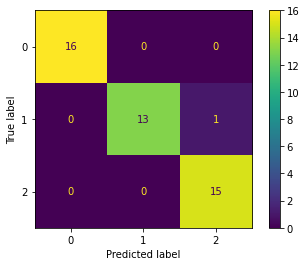

In [18]:

# code
data4 = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(data4.data, data4.target,test_size=0.3)

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train) 

y_pred = classifier.predict(x_test)

print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

print ("Confusion: \n", confusion_matrix(y_test, y_pred))

print ("Precision score: ", precision_score(y_test, y_pred, average="weighted"))

print ("Recall score: ", recall_score(y_test, y_pred, average="weighted"))

print ("F1 score: ", f1_score(y_test, y_pred, average="weighted"))

print ("ConfusionMatrixDisplay:", ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [25]:
from sklearn import datasets
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
# code
mnist = datasets.load_digits()
print("Number of images: ", len(mnist.images))
print("Number of labels: ", len(mnist.target))
print("Classes: ", mnist.target_names)

x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

clf = LogisticRegression()

clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"Accuracy: {accuracy}")




Number of images:  1797
Number of labels:  1797
Classes:  [0 1 2 3 4 5 6 7 8 9]
Accuracy: 0.9694444444444444


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [47]:
# code
k_range = list(range(1, 30, 2))
#k_range = np.array(1, 30, 2)
data4 = datasets.load_iris()
acls=[]
precision=[]
recall=[]
f1=[]

for k in k_range:
  KNN= KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  y_pred =KNN.predict(x_test)
  acls.append(y_pred)

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average="micro")
lr_recall = recall_score(y_test, y_pred, average="micro")
lr_f1 = f1_score(y_test, y_pred, average="micro")
print("kNN Metrics:")
for k, accuracy, precision, recall, f1 in knn_metrics:
    print(f"k = {k}: Accuracy = {accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1 = {f1:.2f}")
print(f"\nLogistic Regression Metrics: Accuracy = {lr_accuracy:.2f}, Precision = {lr_precision:.2f}, Recall = {lr_recall:.2f}, F1 = {lr_f1:.2f}")
#  precision.append(precision_score(y_test,y_pred, np.average='micro'))


kNN Metrics:
k = 1: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 3: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 5: Accuracy = 0.99, Precision = 0.99, Recall = 0.99, F1 = 0.99
k = 7: Accuracy = 0.99, Precision = 0.99, Recall = 0.99, F1 = 0.99
k = 9: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 11: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 13: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 15: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 17: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 19: Accuracy = 0.97, Precision = 0.98, Recall = 0.97, F1 = 0.97
k = 21: Accuracy = 0.97, Precision = 0.98, Recall = 0.97, F1 = 0.97
k = 23: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 25: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 27: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 29: Accuracy = 0.97, Precision = 0.9

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [44]:
# code
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the MNIST dataset
digits = load_digits()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Perform kNN algorithm for k = 1, 3, 5, ..., 29
k_values = list(range(1, 30, 2))
knn_metrics = []
for k in k_values:
    # Train the kNN model with the given k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    knn_metrics.append((k, accuracy, precision, recall, f1))

# Find the best value of k based on the highest f1 score
best_k = max(knn_metrics, key=lambda x: x[4])[0]
print(f"Best value of k for kNN: {best_k}\n")

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average="weighted")
lr_recall = recall_score(y_test, y_pred, average="weighted")
lr_f1 = f1_score(y_test, y_pred, average="weighted")

# Print the results for both kNN and Logistic Regression
print("kNN Metrics:")
for k, accuracy, precision, recall, f1 in knn_metrics:
    print(f"k = {k}: Accuracy = {accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1 = {f1:.2f}")
print(f"\nLogistic Regression Metrics: Accuracy = {lr_accuracy:.2f}, Precision = {lr_precision:.2f}, Recall = {lr_recall:.2f}, F1 = {lr_f1:.2f}")

Best value of k for kNN: 7

kNN Metrics:
k = 1: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 3: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 5: Accuracy = 0.99, Precision = 0.99, Recall = 0.99, F1 = 0.99
k = 7: Accuracy = 0.99, Precision = 0.99, Recall = 0.99, F1 = 0.99
k = 9: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 11: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 13: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 15: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 17: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 19: Accuracy = 0.97, Precision = 0.98, Recall = 0.97, F1 = 0.97
k = 21: Accuracy = 0.97, Precision = 0.98, Recall = 0.97, F1 = 0.97
k = 23: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 25: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 27: Accuracy = 0.98, Precision = 0.98, Recall = 0.98, F1 = 0.98
k = 29: Accu

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [ ]:
# code

#Finally,
Save a copy in your Github. Remember renaming the notebook.